The purpose of this notebook is to conduct EDA on the USPTO phrase to phrase data provided by Kaggle.

# Plan of Action
* Load data
* Initial data characteristics
* Data visualizations

## Load Data

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [27]:
data = pd.read_csv('../data/raw/train.csv')

In [28]:
data.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [29]:
data.describe()

,score
count,36473.000000
mean,0.362062
std,0.258335
min,0.000000
25%,0.250000
50%,0.250000
75%,0.500000
max,1.000000


#### Looking at occurence of anchor tags
I want to see how many times each anchor tag is used

/tmp/ipykernel_5492/3268280468.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(anchor_counts.index, rotation=45)


''

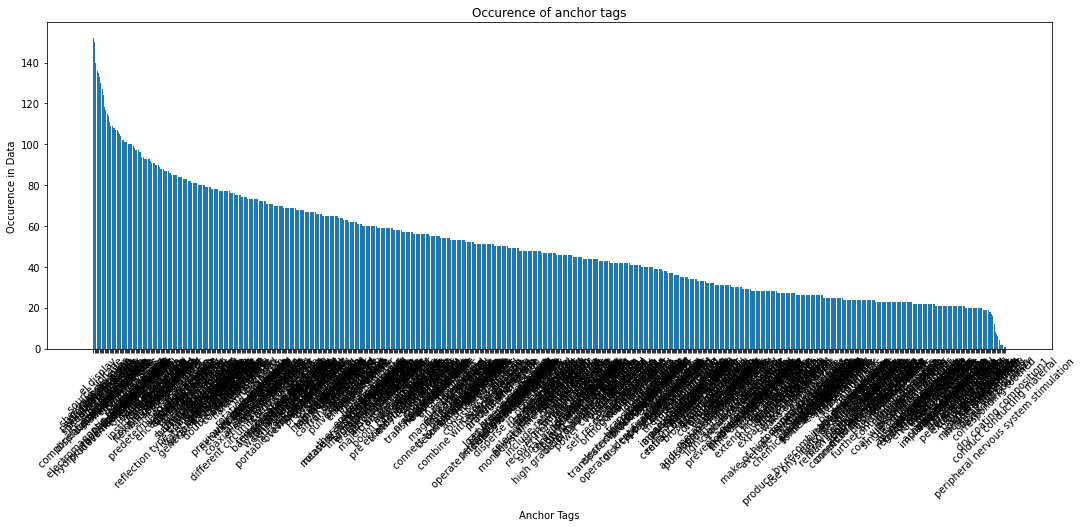

In [30]:
anchor_counts = data.anchor.value_counts()
fig, ax = plt.subplots(1,1,figsize=(18,6))
ax.bar(x=anchor_counts.index, height=anchor_counts)
ax.set_title('Occurence of anchor tags')
ax.set_xlabel('Anchor Tags')
ax.set_ylabel('Occurence in Data')
ax.set_xticklabels(anchor_counts.index, rotation=45)
;

Definitely a long tailed distribution, lets look at how many times each context group is used

#### Occurence of Context Tags

/tmp/ipykernel_5492/3395637649.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(context_counts.index, rotation=45, fontsize=10)


''

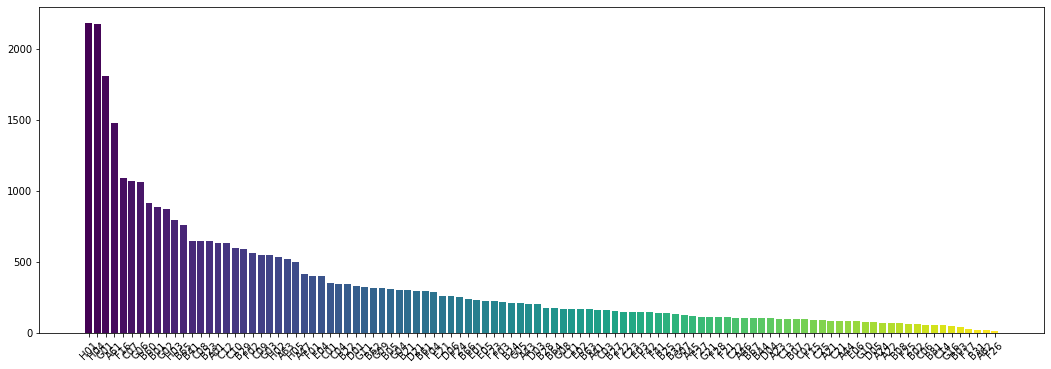

In [31]:
context_counts = data.context.value_counts()
fig, ax = plt.subplots(1,1, figsize=(18,6))
cmap = plt.get_cmap('viridis')
colors = np.linspace(0,1,num=len(context_counts))
ax.bar(x=context_counts.index, height=context_counts, color=cmap(colors))
ax.set_xticklabels(context_counts.index, rotation=45, fontsize=10)
;

In [32]:
data['section'] = data['context'].apply(lambda x: x[0])
data['class'] = data['context'].apply(lambda x: x[1])
data['subclass'] = data['context'].apply(lambda x: x[2])
data['group'] = data['context'].apply(lambda x: x[3:5])
data['subgroup'] = data['context'].apply(lambda x: x[5:])

In [33]:
data.head()

,id,anchor,target,context,score,section,class,subclass,group,subgroup
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,A,4,7,,
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,A,4,7,,
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,A,4,7,,
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,A,4,7,,
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,A,4,7,,


/tmp/ipykernel_5492/787013872.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(section_counts.index, rotation=45, fontsize=10)


Text(0.5, 1.0, 'Occurence of CPC Section in data')

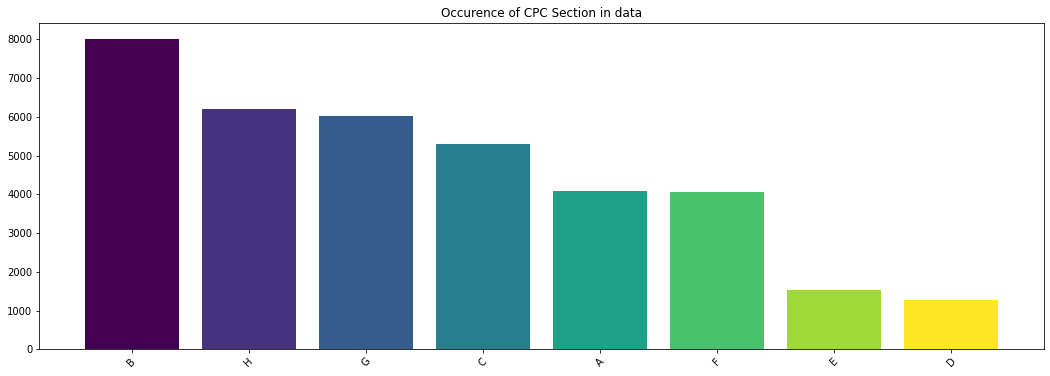

In [34]:
section_counts = data.section.value_counts()
fig, ax = plt.subplots(1,1, figsize=(18,6))
cmap = plt.get_cmap('viridis')
colors = np.linspace(0,1, num=len(section_counts))
ax.bar(x=section_counts.index, height=section_counts, color=cmap(colors))
ax.set_xticklabels(section_counts.index, rotation=45, fontsize=10)
ax.set_title('Occurence of CPC Section in data')

The corresponding sections are:
* A: Human Necessities
* B: Operations and Transport
* C: Chemistry and Metallurgy
* D: Textiles
* E: Fixed Constructions
* F: Mechanical Engineering
* G: Physics
* H: Electricity
* Y: Emerging Cross-Sectional Technologies

So Operations and Transport; Electricity; and Physics lead the pack with Textiles and Fixed Constructions bringing up the tail.  This may be useful later if we want to use a separate language model trained on a corpus relating to each subject area.

#### Occurence of Class within each Section
The context is two pieces of information in one, [see this link](https://en.wikipedia.org/wiki/Cooperative_Patent_Classification), so while it may not lead to anything in the implementation is may be useful for understanding.

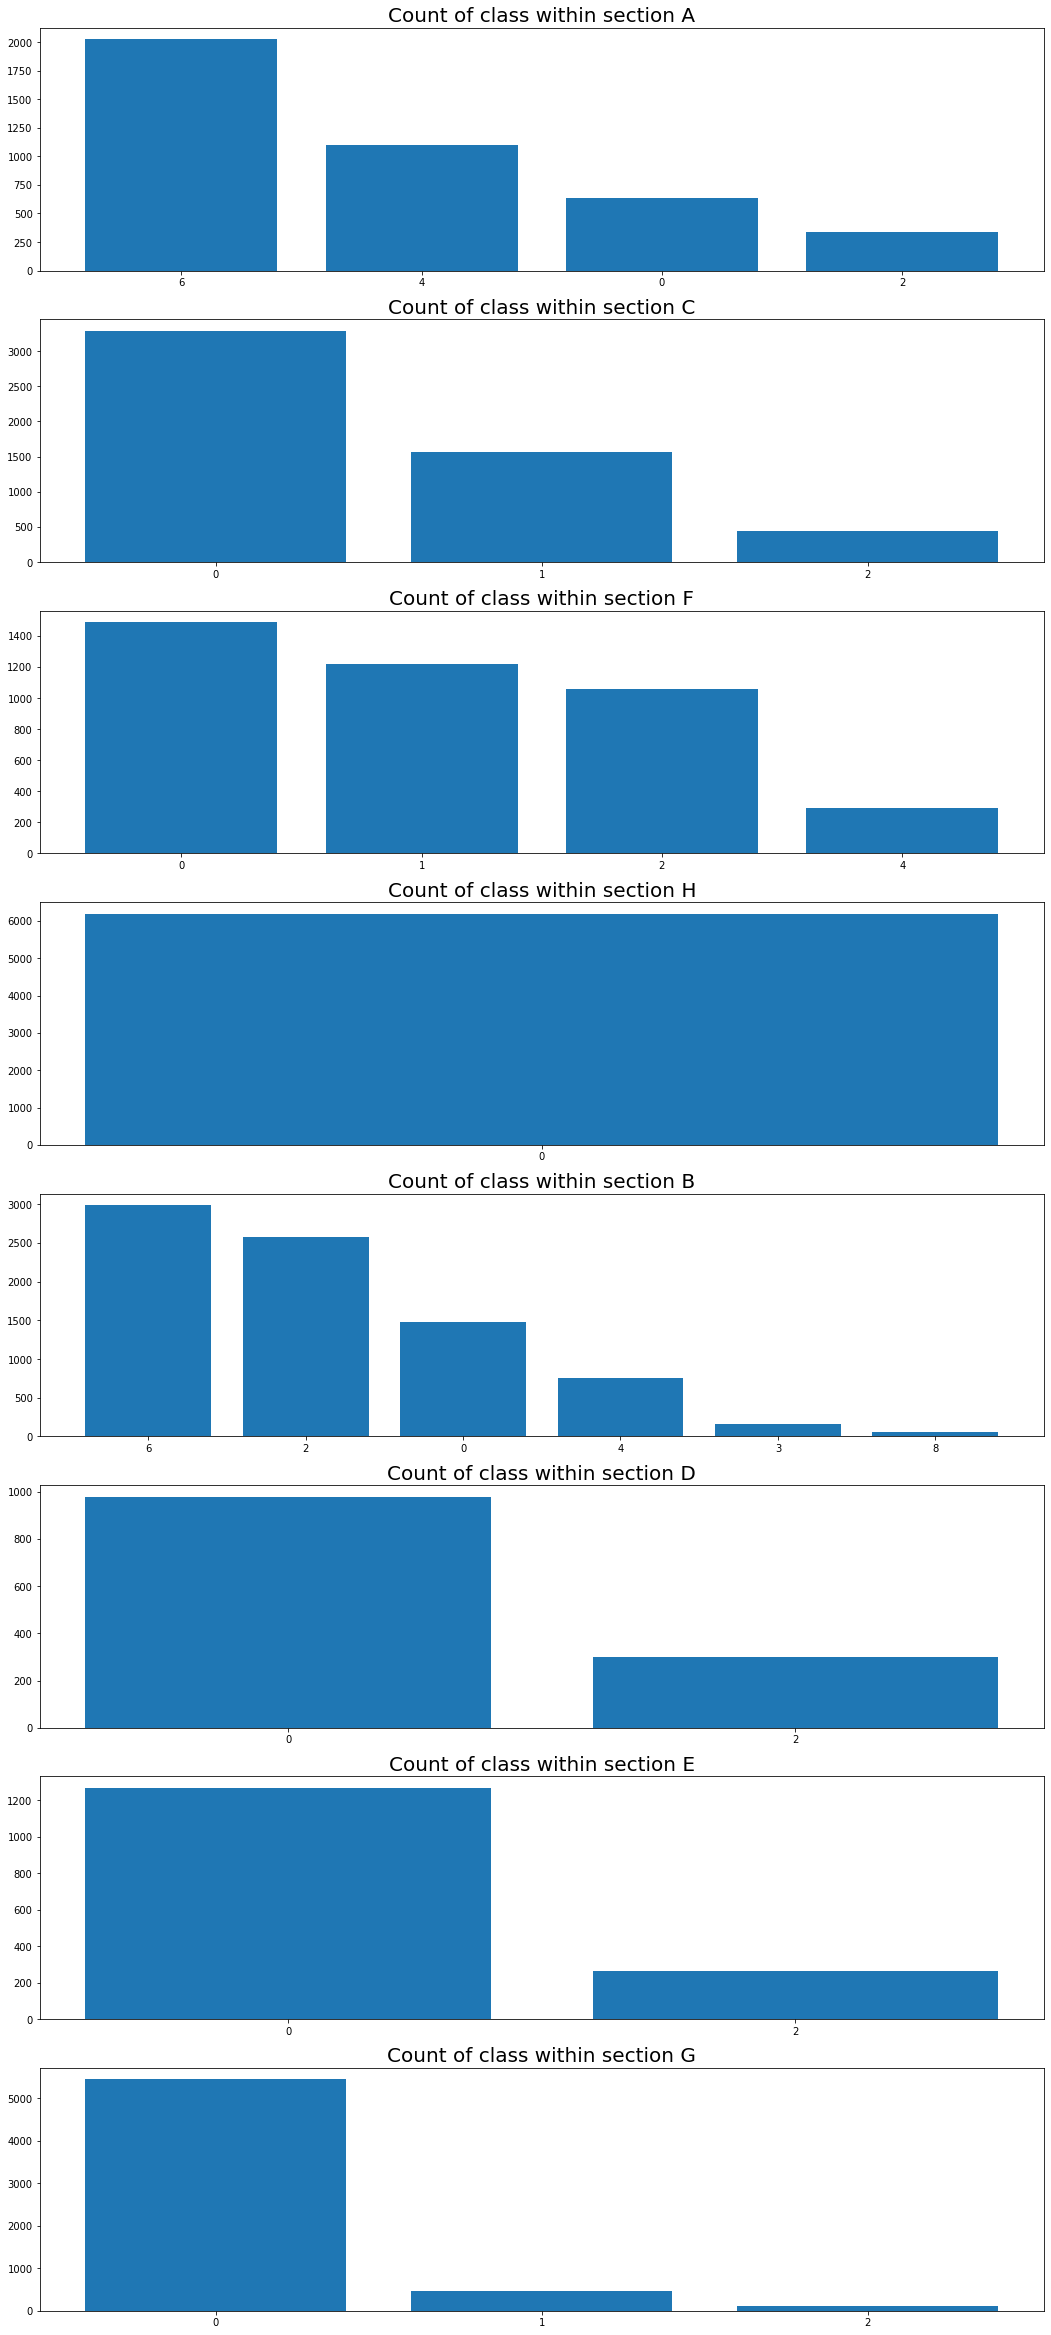

In [35]:
num_plots = len(data.section.unique())
fig, axes = plt.subplots(num_plots, 1, figsize=(18,42))
axes= axes.flatten()
for i, section in enumerate(data.section.unique()):
    subset = data[data['section']==section]
    subset_data = subset['class'].value_counts()
    ax = axes[i]
    ax.set_title(f'Count of class within section {section}', fontsize=20)
    ax.bar(x=subset_data.index, height=subset_data)

Interesting, but I'm not sure what we'd do with it.  Lets noodle on that.

In [25]:
data.to_csv('../data/interim/data_with_cpc_structure.csv', index=False)